In [11]:
# Import all Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [12]:
# Load Dataset
df=pd.read_csv("case1_telecom_kmeans_1000.csv")
df.head()

,MonthlyCharges,Tenure,DataUsageGB,CallDurationMin
0,402,29,4,342
1,570,25,7,397
2,406,43,6,246
3,371,51,6,277
4,488,34,4,323


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   MonthlyCharges   999 non-null    int64
 1   Tenure           999 non-null    int64
 2   DataUsageGB      999 non-null    int64
 3   CallDurationMin  999 non-null    int64
dtypes: int64(4)
memory usage: 31.3 KB


In [16]:
# Feature
X=df[["MonthlyCharges","Tenure","DataUsageGB","CallDurationMin"]]

In [17]:
# Scaling
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

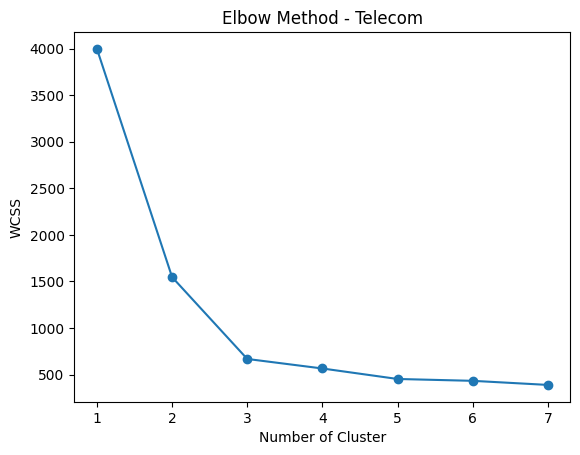

In [20]:
# Elbow method
wcss=[]
for k in range(1,8):
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1,8),wcss,marker='o')
plt.xlabel("Number of Cluster")
plt.ylabel("WCSS")
plt.title("Elbow Method - Telecom")
plt.show()

In [21]:
# K-means
kmeans=KMeans(n_clusters=3,random_state=42)
df['Cluster']=kmeans.fit_predict(X_scaled)

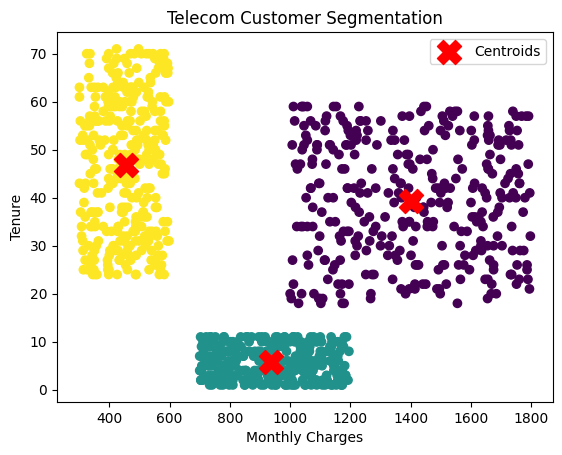

In [27]:
plt.scatter(df["MonthlyCharges"], df["Tenure"], c=df["Cluster"])
# Plot centroids
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    s=300,
    c='red',
    marker='X',
    label='Centroids'
)
plt.xlabel("Monthly Charges")
plt.ylabel("Tenure")
plt.title("Telecom Customer Segmentation")
plt.legend()
plt.show()